Connected to Python 3.12.4

Sample Data:
                                             content            timestamp
0                   Loving the new #AI trends! #tech  2024-11-01 10:00:00
1           Exploring #AI in daily life. #innovation  2024-11-01 12:00:00
2   The rise of #AI #machinelearning is fascinating!  2024-11-02 09:30:00
3  People are talking about #tech and #innovation...  2024-11-02 14:45:00
4    #AI and #robotics are shaping the future. #tech  2024-11-03 08:15:00

Top 5 Hashtags:
#AI                 8
#tech               6
#innovation         4
#machinelearning    3
#robotics           1
Name: count, dtype: int64

Analyzing trend for hashtag: #AI


<ipython-input-1-ef0ae86506cd>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['date'] = trend_data['timestamp'].dt.date


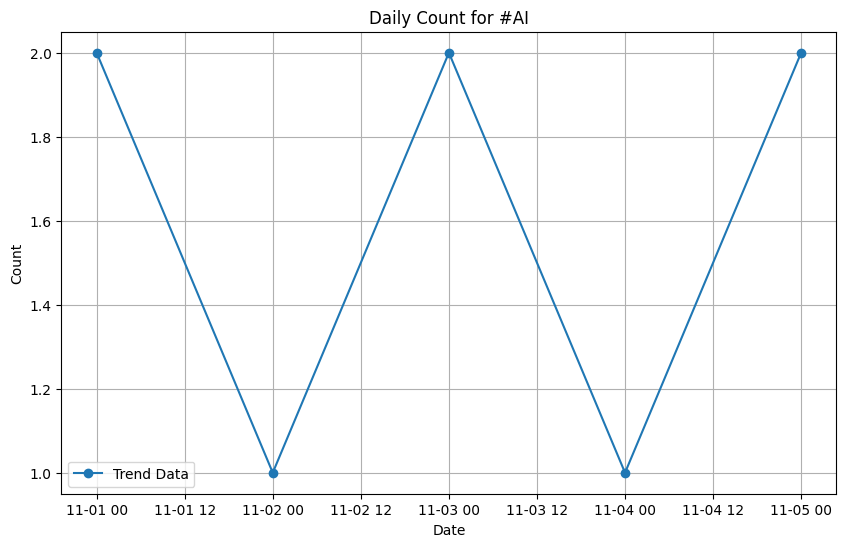


Mean Squared Error: 0.73


c:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


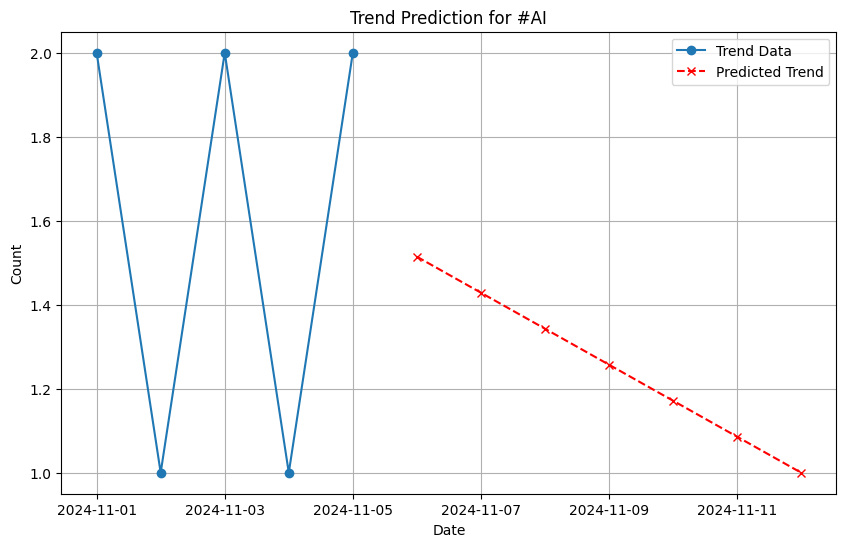


Predicted trend saved to 'predicted_trend.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime as dt
import re

# Load data
file_path = "social_media_data.csv"  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Display the first few rows
print("Sample Data:")
print(data.head())

# Preprocessing
def preprocess_text(text):
    """Extract hashtags from text."""
    hashtags = re.findall(r"#\w+", text)
    return hashtags

data['hashtags'] = data['content'].apply(preprocess_text)
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Extracting hashtags and their counts
all_hashtags = [hashtag for hashtags in data['hashtags'] for hashtag in hashtags]
hashtag_counts = pd.Series(all_hashtags).value_counts()
print("\nTop 5 Hashtags:")
print(hashtag_counts.head())

# Trend analysis for a single hashtag
trend_hashtag = hashtag_counts.index[0]  # Select the most frequent hashtag
print(f"\nAnalyzing trend for hashtag: {trend_hashtag}")

# Filter data for the selected hashtag
data['contains_trend'] = data['hashtags'].apply(lambda x: trend_hashtag in x)
trend_data = data[data['contains_trend']]

# Aggregating counts by day
trend_data['date'] = trend_data['timestamp'].dt.date
trend_daily = trend_data.groupby('date').size().reset_index(name='count')

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(trend_daily['date'], trend_daily['count'], marker='o', label='Trend Data')
plt.title(f"Daily Count for {trend_hashtag}")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid()
plt.legend()
plt.show()

# Predict future trends using Linear Regression
# Prepare data for prediction
trend_daily['date_ordinal'] = trend_daily['date'].apply(lambda x: x.toordinal())  # Convert date to ordinal
X = trend_daily[['date_ordinal']]
y = trend_daily['count']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")

# Future prediction
future_days = 7
last_date = trend_daily['date'].max()
future_dates = [last_date + dt.timedelta(days=i) for i in range(1, future_days + 1)]
future_dates_ordinal = [d.toordinal() for d in future_dates]

# Predict future counts
future_counts = model.predict(pd.DataFrame(future_dates_ordinal))

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(trend_daily['date'], trend_daily['count'], marker='o', label='Trend Data')
plt.plot(future_dates, future_counts, marker='x', label='Predicted Trend', linestyle='--', color='red')
plt.title(f"Trend Prediction for {trend_hashtag}")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid()
plt.legend()
plt.show()

# Save results
predicted_trend = pd.DataFrame({
    'Date': future_dates,
    'Predicted Count': future_counts
})
predicted_trend.to_csv("predicted_trend.csv", index=False)
print("\nPredicted trend saved to 'predicted_trend.csv'.")